In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##The module of the schemes
##For we have already define P as 2 in case A, so the formula I wrote below didn't show the parameter P but a certain number 2.

In [3]:
#a small test of Newton iterative method
A=3
B=4
X=0
d=2
Y=A*X**3+X-B

while (d>=0.00000000001):
    Yd=3*A*X**2+1
    X=-Y/Yd+X
    Y=A*X**3+X-B
    d=Y-0
print(X)
    

1.0


In [4]:
def iterativeB(X,P,A,B): #the iterative method only suitable in form A*X**P+X-B=0, which X is the unknowner power, A,B,P are the coefficents.
    d=2
    Y=A*X**P+X-B
    n = 0
    while (d>=1e-6 and n < 10):
        Yd=P*A*X**(P-1)+1
        X=-Y/Yd+X
        Y=A*X**P+X-B
        d=np.abs(Y-0)
        n+= 1
    return X

In [5]:
iterativeB(0,3,5,10)

1.2070400939373245

In [6]:
#Backward implicit(scheme.b)
#We know the solution of the X(n+1) is like A*X**3+X=B, which A=K*dt, B=S*dt+X(n) which can be represent as constant in certain n,
def SchemeB(X0,n,P,dt,K):
    n=n+1
    X=np.zeros(n)
    t=np.zeros(n)
    Amplification=np.zeros(n)
    t[0]=0
    X[0]=X0   
    for i in range(1,n):
        S=1+np.sin(2*np.pi*(i)/20*dt)# I think something unclearly explained with the Formula of S in the article,
                                    # only in this form can it output similar graph with different dt, on the articl wrote S=1+np.sin(2*np.pi*i/20)
        Xe=(S/K)**(1/(P+1))#equilibrium solution
        X[i]=iterativeB(0,P+1,K*dt,S*dt+X[i-1])
        t[i]=dt*i
        
        X0=(S/K)**(1/(P+1))
        alpha=K*X0**P*dt
        
        if abs(X[i]) > 1000:
            break
        
        Amplification[i]=1/(1+alpha*(P+1))#amplification factor
    return X,t,Amplification

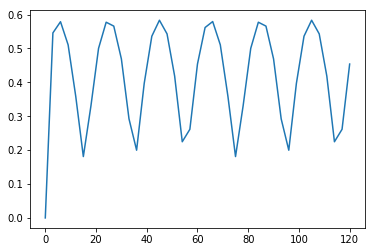

In [7]:
A=SchemeB(0,40,2,3,10)[0]
B=SchemeB(0,40,2,3,10)[1]
plt.plot(B,A)

In [8]:
#Crank-Nicholson, Scheme.c, there is a problem, if dt is little big, such as 1, the initial point will cause a tremble.

#We know the solution of the (X(n+1)+X(n))/2 is like A*X**3+X=B(the same as scheme.b),
#which A=K*dt/2, B=S*dt/2+X[n] which can be represented as constant in certain n.
def SchemeC(X0,n,P,dt,K):
    n=n+1
    X=np.zeros(n)
    t=np.zeros(n)
    Amplification=np.zeros(n)
    t[0]=0
    X[0]=X0 
    for i in range(1,n):
        S=1+np.sin(2*np.pi*(i)/20*dt)
        Xnp1=2*iterativeB(0,P+1,K*dt/2,S*dt/2+X[i-1])-X[i-1]#(X(n+1)
        Xe=(S/K)**(1/(P+1))#equilibrium solution
        X[i]=Xnp1
        t[i]=dt*i
        X0=(S/K)**(1/(P+1))
        alpha=K*X0**P*dt
        Amplification[i]=(1-alpha*(P+1)/2)/(1+alpha*(P+1)/2)#amplification factor
        
    return X,t,Amplification

A=SchemeB(0,100,1,10)[0]
B=SchemeB(0,100,1,10)[1]
plt.plot(B,A)

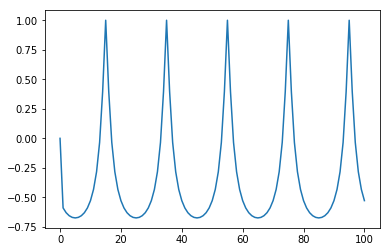

In [9]:
A=SchemeC(0,100,2,1,10)[2]
B=SchemeC(0,100,2,1,10)[1]
plt.plot(B,A)


In [10]:
#Explicit coefficent implicit temperature, Scheme.d

def SchemeD(X0,n,P,dt,K):
    n=n+1
    X=np.zeros(n)
    t=np.zeros(n)
    Amplification=np.zeros(n)
    t[0]=0
    X[0]=X0  
    for i in range(1,n):
        S=1+np.sin(2*np.pi*(i)/20*dt)
        Xnp1=(X[i-1]+S*dt)/(1+K*X[i-1]**P*dt)
        X0=(S/K)**(1/(P+1))
        alpha=K*X0**P*dt
        Amplification[i]=(1-alpha*(P))/(1+alpha)#amplification factor
        X[i]=Xnp1
        t[i]=dt*i
    
        
    return X,t,Amplification

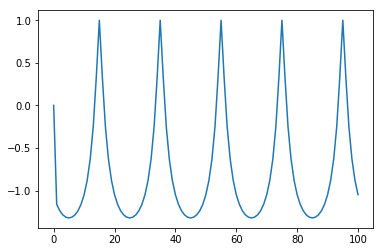

In [11]:
A=SchemeD(0,100,2,1,10)[2]
B=SchemeD(0,100,2,1,10)[1]
plt.plot(B,A)

In [12]:
#Predictor-corrector coefficient, implicit temperature, scheme.e
def SchemeE(X0,n,P,dt,K):
    n=n+1
    X=np.zeros(n)
    t=np.zeros(n)
    Amplification=np.zeros(n)
    t[0]=0
    X[0]=X0
    for i in range(1,n):
        S=1+np.sin(2*np.pi*(i)/20*dt)
        Xstar=(X[i-1]+S*dt)/(1+K*X[i-1]**P*dt)#X*
        Xnp1=(X[i-1]+S*dt)/(1+K*Xstar**P*dt)
        X0=(S/K)**(1/(P+1))
        alpha=K*X0**P*dt
        Amplification[i]=(1-alpha*(P-1)+(alpha*P)**2)/(1+alpha)**2#amplification factor
        X[i]=Xnp1
        t[i]=dt*i
    return X,t,Amplification

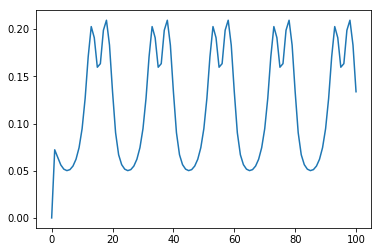

In [13]:
A=SchemeE(0,100,2,1,10)[0]
B=SchemeE(0,100,2,1,10)[1]
plt.plot(B,A)

In [14]:
#Averaged coefficient (t*,tn), implicit temperature,scheme.f
def SchemeF(X0,n,P,dt,K):
    n=n+1
    X=np.zeros(n)
    t=np.zeros(n)
    Amplification=np.zeros(n)
    t[0]=0
    X[0]=X0  
    for i in range(1,n):
        S=1+np.sin(2*np.pi*(i)/20*dt)
        Xstar=(X[i-1]+S*dt)/(1+K*X[i-1]**P*dt)#X*
        Xnp1=(X[i-1]+S*dt)/(1+K*(X[i-1]**P+Xstar**P)/2*dt)
        X0=(S/K)**(1/(P+1))
        alpha=K*X0**P*dt
        Amplification[i]=(1-alpha*(P-1)*(alpha**2*P/2)+(alpha*P)**2/2)/(1+alpha)**2#amplification factor
        X[i]=Xnp1
        t[i]=dt*i
    return X,t,Amplification

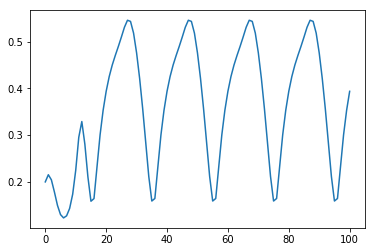

In [15]:
A=SchemeF(0.2,100,2,1,10)[0]
B=SchemeF(0.2,100,2,1,10)[1]
plt.plot(B,A)

In [16]:
#Explicit coefficient, extrapolated temperature, scheme.g

def SchemeG(X0,n,P,dt,K,gamma):
    n=n+1
    X=np.zeros(n)
    t=np.zeros(n)
    Amplification=np.zeros(n)
    t[0]=0
    X[0]=X0 
    for i in range(1,n):
        S=1+np.sin(2*np.pi*(i)/20*dt)
        Xnp1=(-K*X[i-1]**3*(1-gamma)*dt+S*dt+X[i-1])/(1+K*gamma*dt*X[i-1]**P)
        X0=(S/K)**(1/(P+1))
        alpha=K*X0**P*dt
        Amplification[i]=(1-alpha*(P+1-gamma))/(1+alpha*gamma)#amplification factor
        X[i]=Xnp1
        t[i]=dt*i
    return X,t,Amplification

In [17]:
A=SchemeG(0,100,2,1,10,1.5)[0]
B=SchemeG(0,100,2,1,10,1.5)[1]
plt.plot(B,A)

In [18]:
#Explicit coefficient, implcit temperature,followed by time filter scheme.h

def SchemeH(X0,n,P,dt,K,A):
    n=n+1
    X=np.zeros(n)
    t=np.zeros(n)
    Amplification=np.zeros(n)
    t[0]=0
    X[0]=X0 
    for i in range(1,n):
        S=1+np.sin(2*np.pi*(i)/20*dt)
        Xstar=(X[i-1]+S*dt)/(1+K*X[i-1]**P*dt)#X*
        Xnp1=(1-A)*Xstar+A*X[i-1]
        X0=(S/K)**(1/(P+1))
        alpha=K*X0**P*dt
        Amplification[i]=(1-A)*((1-alpha*P)/(1+alpha))+A#amplification factor
        X[i]=Xnp1
        t[i]=dt*i
    return X,t,Amplification

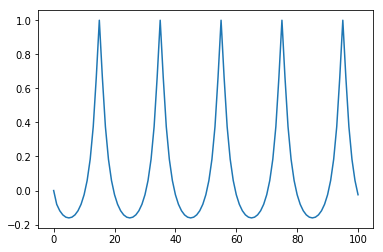

In [19]:
A=SchemeH(0,100,2,1,10,0.5)[2]
B=SchemeH(0,100,2,1,10,0.5)[1]
plt.plot(B,A)

In [20]:
#Double time step, explicit coefficient, implicit temperature, followed by time average, scheme.i
def SchemeI(X0,n,P,dt,K):
    n=n+1
    X=np.zeros(n)
    t=np.zeros(n)
    Amplification=np.zeros(n)
    t[0]=0
    X[0]=X0 
    for i in range(0,n):
        S=1+np.sin(2*np.pi*(i)/20*dt)
        Xstar=(X[i-1]+2*S*dt)/(1+2*K*X[i-1]**P*dt)#X*
        Xnp1=(Xstar+X[i-1])/2
        Xe=(S/K)**(1/(P+1))#equilibrium solution
        X0=(S/K)**(1/(P+1))
        alpha=K*X0**P*dt
        Amplification[i]=(1-alpha*(P-1))/(1+2*alpha)#amplification factor
        X[i]=Xnp1
        t[i]=dt*i
    return X,t,Amplification

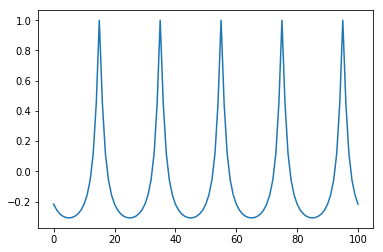

In [21]:
A=SchemeI(0,100,2,1,10)[2]
B=SchemeI(0,100,2,1,10)[1]
plt.plot(B,A)

In [22]:
#Scheme.h but with the time filter applied only when the exchange coefficient is large
def SchemeHplus(X0,n,P,dt,K,A):
    n=n+1
    X=np.zeros(n)
    t=np.zeros(n)
    Amplification=np.zeros(n)
    t[0]=0
    X[0]=X0 
    for i in range(1,n):
        S=1+np.sin(2*np.pi*(i)/20*dt)
        Xe=(S/K)**(1/(P+1))#equilibrium solution
        Xnp1=(X[i-1]+S*dt)/(1+K*X[i-1]**P*dt)#same as scheme d
        if np.abs((Xnp1-Xe)/(X[i-1]-Xe))<1: #test if the the amplification factor is equal or larger than 1, applying time filter
            X[i]=(Xnp1)
        else:       #same as scheme.h
            Xstar=(X[i-1]+S*dt)/(1+K*X[i-1]**P*dt)#X*
            Xnp1=(1-A)*Xstar+A*X[i-1]
        X[i]=Xnp1
        t[i]=(dt*i)

    return X,t

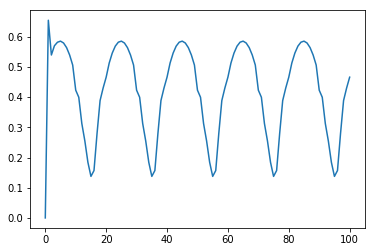

In [23]:
A=SchemeHplus(0,100,2,1,10,0.5)[0]
B=SchemeHplus(0,100,2,1,10,0.5)[1]
plt.plot(B,A)

In [24]:
#The scheme not mention in the section 2 but show on the thrid panel of the middle row.
def SchemeX(X0,n,P,dt,K):
    n=n+1
    X=np.zeros(n)
    t=np.zeros(n)
    Amplification=np.zeros(n)
    t[0]=0
    X[0]=X0
    X[1]=(SchemeHplus(X0,n,P,dt,K,0.5)[0][1])#for it is the three-time level scheme, X[1]will use other two-level scheme to calculate
    S=1+np.sin(2*np.pi*0/20*dt)
    Xe=(S/K)**(1/(P+1))#equilibrium solution

    for i in range(2,n):
        S=1+np.sin(2*np.pi*(i)/20*dt)
        Xnp1=(X[i-1]+S*dt)/(1+K*(X[i-1]**P+X[i-2]**P)/2*dt)
        Xe=(S/K)**(1/(P+1))#equilibrium solution
        X[i]=(Xnp1)
        t[i]=(dt*i)

    return X,t

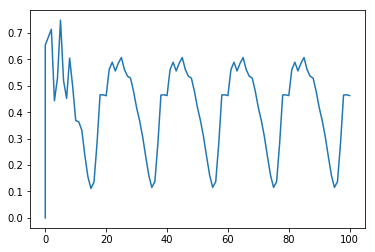

In [25]:
A=SchemeX(0,100,2,1,10)[0]
B=SchemeX(0,100,2,1,10)[1]
plt.plot(B,A)

In [26]:
#A easy way to plot graph of all schemes and output their datas
def CallAllSchemes(X0,n,P,dt,K,A,gamma):
    fig=plt.figure(figsize=(12,8))
    AllSchemes=[SchemeB,SchemeX,SchemeD,SchemeE,SchemeF,SchemeG,SchemeH,SchemeI,SchemeHplus]
    SchemeName=['${C_n+1}$${X_n+1}$\n scheme.b','(${C_n}$+${C_n+1}$/2)','${C_n}$${X_n+1}$\nscheme.d'\
               ,'${C_*}$\nscheme.e','(${C_*}$${C_n}$/2)\nscheme.f','${C_n}$(γ${X_n+1}$+(1-γ)${X_n}$)\nscheme.g'\
               ,'Δt;${X_n+1}$=(${X_n}$+X)/2\nscheme.h','2Δt;${X_n+1}$=(${X_n}$+X)/2\nscheme.i','Δt;AVERAGED WHEN OSCILLATORY']
    plt.subplots_adjust(hspace=1)
    SchemeDatas=np.zeros(9)
    for i in range(0,9):
        
        ax=plt.subplot(330+i+1)
        if i==5:
            schemedata=AllSchemes[i](X0,n,P,dt,K,gamma)
            ax.plot(schemedata[1],schemedata[0])
        elif i==6 or i==8:
            schemedata=AllSchemes[i](X0,n,P,dt,K,A)
            ax.plot(schemedata[1],schemedata[0])
        else:
            schemedata=AllSchemes[i](X0,n,P,dt,K)
            ax.plot(schemedata[1],schemedata[0])
        ax.set_title(SchemeName[i])
        ax.set_ylim(0,1)
        SchemeDatas=schemedata
    plot=plt.show()
    return SchemeDatas,plot

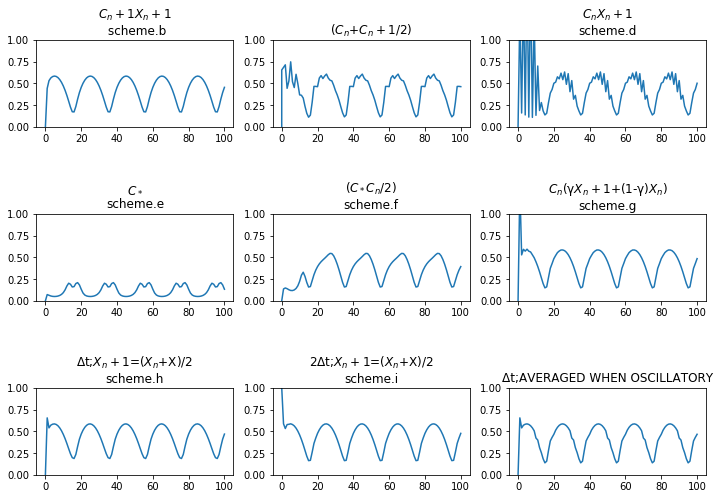

((array([ 0.        ,  0.6545085 ,  0.53943941,  0.57003776,  0.58165796,
          0.58531962,  0.57919184,  0.5638107 ,  0.53934565,  0.50610059,
          0.42289826,  0.39946548,  0.31269865,  0.25466706,  0.18416789,
          0.13752307,  0.15680976,  0.27915139,  0.38857058,  0.43012315,
          0.46595516,  0.51284081,  0.5457583 ,  0.56881515,  0.58187749,
          0.5852829 ,  0.57919716,  0.56381009,  0.5393457 ,  0.50610059,
          0.42289826,  0.39946548,  0.31269865,  0.25466706,  0.18416789,
          0.13752307,  0.15680976,  0.27915139,  0.38857058,  0.43012315,
          0.46595516,  0.51284081,  0.5457583 ,  0.56881515,  0.58187749,
          0.5852829 ,  0.57919716,  0.56381009,  0.5393457 ,  0.50610059,
          0.42289826,  0.39946548,  0.31269865,  0.25466706,  0.18416789,
          0.13752307,  0.15680976,  0.27915139,  0.38857058,  0.43012315,
          0.46595516,  0.51284081,  0.5457583 ,  0.56881515,  0.58187749,
          0.5852829 ,  0.57919716,  0.

In [27]:
CallAllSchemes(0,100,2,1,10,0.5,1.5)

In [28]:
#small test with constant S(represent varing prosesses)
def SchemeBB(X0,n,P,dt,K,S):#this is the scheme B in the occation that S is a constant
    
    X=np.zeros(n)
    t=np.zeros(n)
    Amplification=np.zeros(n)
    t[0]=0
    X[0]=X0   
    for i in range(1,n):
        S=1
                                    # only in this form can it output similar graph with different dt, on the articl wrote S=1+np.sin(2*np.pi*i/20)
        Xe=(S/K)**(1/(P+1))#equilibrium solution
        X[i]=iterativeB(0,P+1,K*dt,S*dt+X[i-1])
        t[i]=dt*i
        
        X0=(S/K)**(1/(P+1))
        alpha=K*X0**P*dt
        Amplification[i]=1/(1+alpha*(P+1))#amplification factor
    return X,t,Amplification

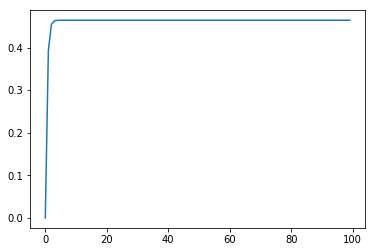

In [29]:
#Occation when S is zero
A=SchemeBB(0,100,2,1,10,0)[0]
B=SchemeBB(0,100,2,1,10,0)[1]
plt.plot(B,A)

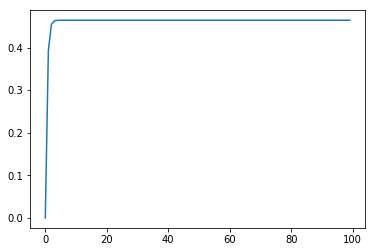

In [30]:
#Occation when S is 1
A=SchemeBB(0,100,2,1,10,1)[0]
B=SchemeBB(0,100,2,1,10,1)[1]
plt.plot(B,A)
# as a result, we can find that if the influence of other heat fluxes will remain a constant, the ground temperature will also keep a certain value

In [31]:
##The task of week 2
##RK4 Method


In [32]:
def f(X,t,P,S,K):#f is the function of local rate of change of ground temperature
    f=-(K*X**P)*X+S
    return f
def SchemeRK4(X0,n,P,dt,K): #RK4 method, X0 is the initial value of ground temperature
    n=n+1
    X=np.zeros(n)           #n is total number of time step
    t=np.zeros(n)           #P represent the nonlinear relation of exchange coefficient with temperature
    t[0]=0                  #dt, time step
    X[0]=X0                 

    for i in range(1,n):
        S=1+np.sin(2*np.pi*(i)/20*dt)
        k1=f(X[i-1],i*dt,P,S,K)
        k2=f(X[i-1]+dt*k1/2,i*dt+dt/2,P,S,K)
        k3=f(X[i-1]+dt*k2/2,i*dt+dt/2,P,S,K)
        k4=f(X[i-1]+dt*k3,i*dt+dt,P,S,K)
        X[i]=X[i-1]+dt*(1/6)*(k1+2*k2+2*k3+k4)
        t[i]=dt*i
    return X,t

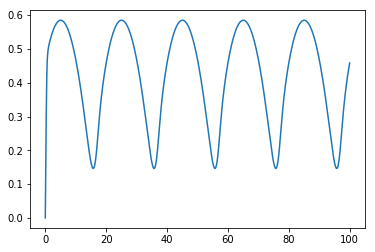

In [33]:
#small test of RK4 method 
A=SchemeRK4(0,1000,2,0.1,10)[0]
B=SchemeRK4(0,1000,2,0.1,10)[1]
plt.plot(B,A)

In [34]:
#A easy way to plot graph of all schemes and output their datas
def CallAllSchemesWithRK4(X0,n,P,dt,K,A,gamma):
    fig=plt.figure(figsize=(25,20))
    AllSchemes=[SchemeB,SchemeX,SchemeD,SchemeE,SchemeF,SchemeG,SchemeH,SchemeI,SchemeHplus]
    SchemeName=['${C_n+1}$${X_n+1}$\n scheme.b','(${C_n}$+${C_n+1}$/2)','${C_n}$${X_n+1}$\nscheme.d'\
               ,'${C_*}$\nscheme.e','(${C_*}$${C_n}$/2)\nscheme.f','${C_n}$(γ${X_n+1}$+(1-γ)${X_n}$)\nscheme.g'\
               ,'Δt;${X_n+1}$=(${X_n}$+X)/2\nscheme.h','2Δt;${X_n+1}$=(${X_n}$+X)/2\nscheme.i','Δt;AVERAGED WHEN OSCILLATORY']
    plt.subplots_adjust(hspace=0.8)
    
    SchemeDatas=list(np.zeros(9))
    for i in range(0,9):
        
        ax=plt.subplot(330+i+1)
        if i==5:
            schemedata=AllSchemes[i](X0,n,P,dt,K,gamma)
            
            
        elif i==6 or i==8:
            schemedata=AllSchemes[i](X0,n,P,dt,K,A)
        
        else:
            schemedata=AllSchemes[i](X0,n,P,dt,K)
        
        ax.plot(schemedata[1],schemedata[0])
        ax.plot(SchemeRK4(X0,10000,P,0.01,K)[1],SchemeRK4(X0,10000,P,0.01,K)[0],linestyle='--')
        ax.set_title(SchemeName[i])
        ax.set_ylim(0,1)
        SchemeDatas[i]=schemedata
    

In [35]:
#graph of time step=0.1
dt=0.1
CallAllSchemesWithRK4(0,int(100/dt),2,dt,10,0.5,1.5)

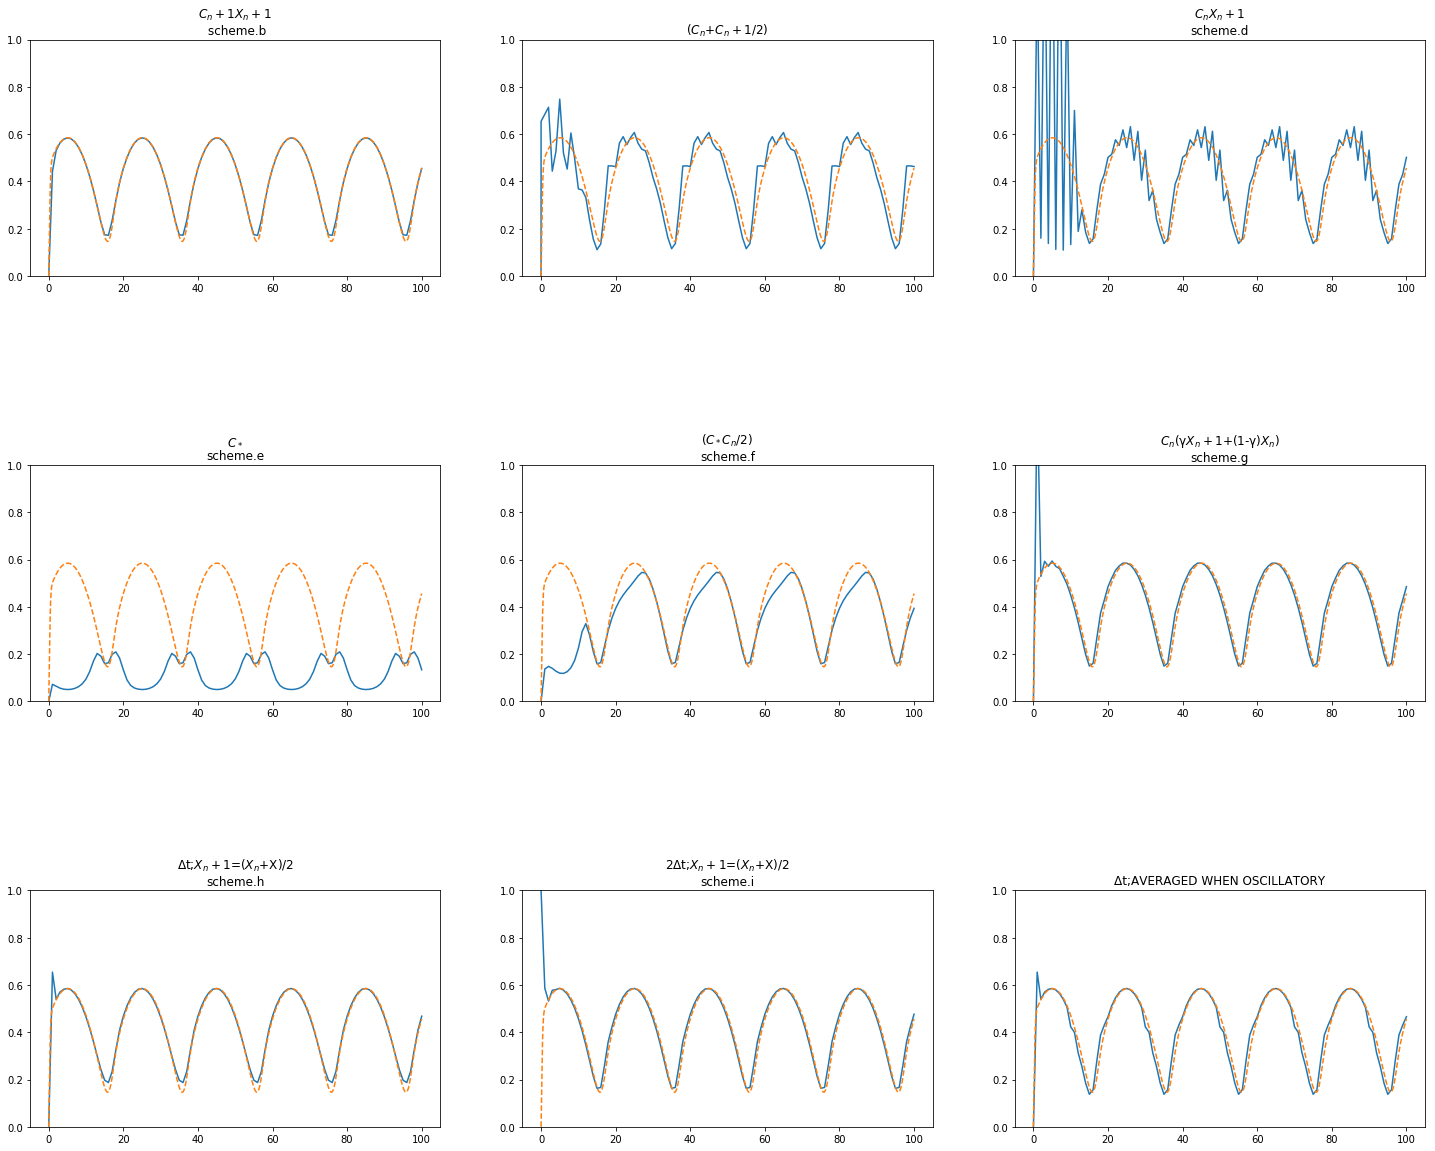

In [36]:
#graph of time step=1
dt=1
CallAllSchemesWithRK4(0,int(100/dt),2,dt,10,0.5,1.5)
plt.show()

In [37]:
#graph of time step=2
dt=2
CallAllSchemesWithRK4(0,int(100/dt),2,dt,10,0.5,1.5)

In [46]:
def AllSchemesERR(X0,P,K,A,gamma):#calculation of error of each methods regarding RK4 method as exact solution
    fig=plt.figure(figsize=(25,20))
    AllSchemes=[SchemeB,SchemeX,SchemeD,SchemeE,SchemeF,SchemeG,SchemeH,SchemeI,SchemeHplus]
    SchemeName=['${C_n+1}$${X_n+1}$\n scheme.b','(${C_n}$+${C_n+1}$/2)','${C_n}$${X_n+1}$\nscheme.d'\
               ,'${C_*}$\nscheme.e','(${C_*}$${C_n}$/2)\nscheme.f','${C_n}$(γ${X_n+1}$+(1-γ)${X_n}$)\nscheme.g'\
               ,'Δt;${X_n+1}$=(${X_n}$+X)/2\nscheme.h','2Δt;${X_n+1}$=(${X_n}$+X)/2\nscheme.i','Δt;AVERAGED WHEN OSCILLATORY']
    fig.suptitle('calculation of error of each methods regarding RK4 method as exact solution',fontsize=40,x=0.53,y=1.05,)
    plt.subplots_adjust(hspace=0.3)
    dtseries=np.arange(0.1,50,0.1)#the value range of dt, I found that if the upper limit of dt is large than 2, the computer would fail to run the code
    ERRs=np.zeros(len(dtseries))
    Exact=SchemeRK4(X0,100000,P,0.001,K)[0]
    ww=0
    for i in range(0,9):
        
        ax=plt.subplot(330+i+1)

        

        ind=0
        
        for dt in dtseries:

            adjustedNum=int((len(Exact)-1)/(dt/0.001))
            adjustedExact=np.zeros(adjustedNum+1)
            j=0
            for q in range(0,adjustedNum+1):#Adjust Exact Solution
                adjustedExact[j]=Exact[q*int(dt/0.001)]
                j+=1
            
            
            if i==5:
            
                schemedata=AllSchemes[i](X0,adjustedNum,P,dt,K,gamma)
            
            
            elif i==6 or i==8:
                schemedata=AllSchemes[i](X0,adjustedNum,P,dt,K,A)
        
            else:
                schemedata=AllSchemes[i](X0,adjustedNum,P,dt,K)
            ComparedSolution=schemedata[0]   

            ExactSolution=adjustedExact

            ERRs[ind]=np.std((ExactSolution-ComparedSolution)[int(20*(1/dt)):])#it means we only consider the values which after 20s,the reason
            ind+=1                                                             #is that during the time between 0s and 20s, many of the graphes of
                                                                               #those schemes shows abnormal values and trembleing, and they will remain
                                                                               #regular fluctuation，so I decide only calculate error after 20s.

        
        ax.plot(dtseries,ERRs)
        ax.set_xlabel('dt')
        ax.set_title(SchemeName[i])
        ax.set_ylim(0,0.3)


/home/hilary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


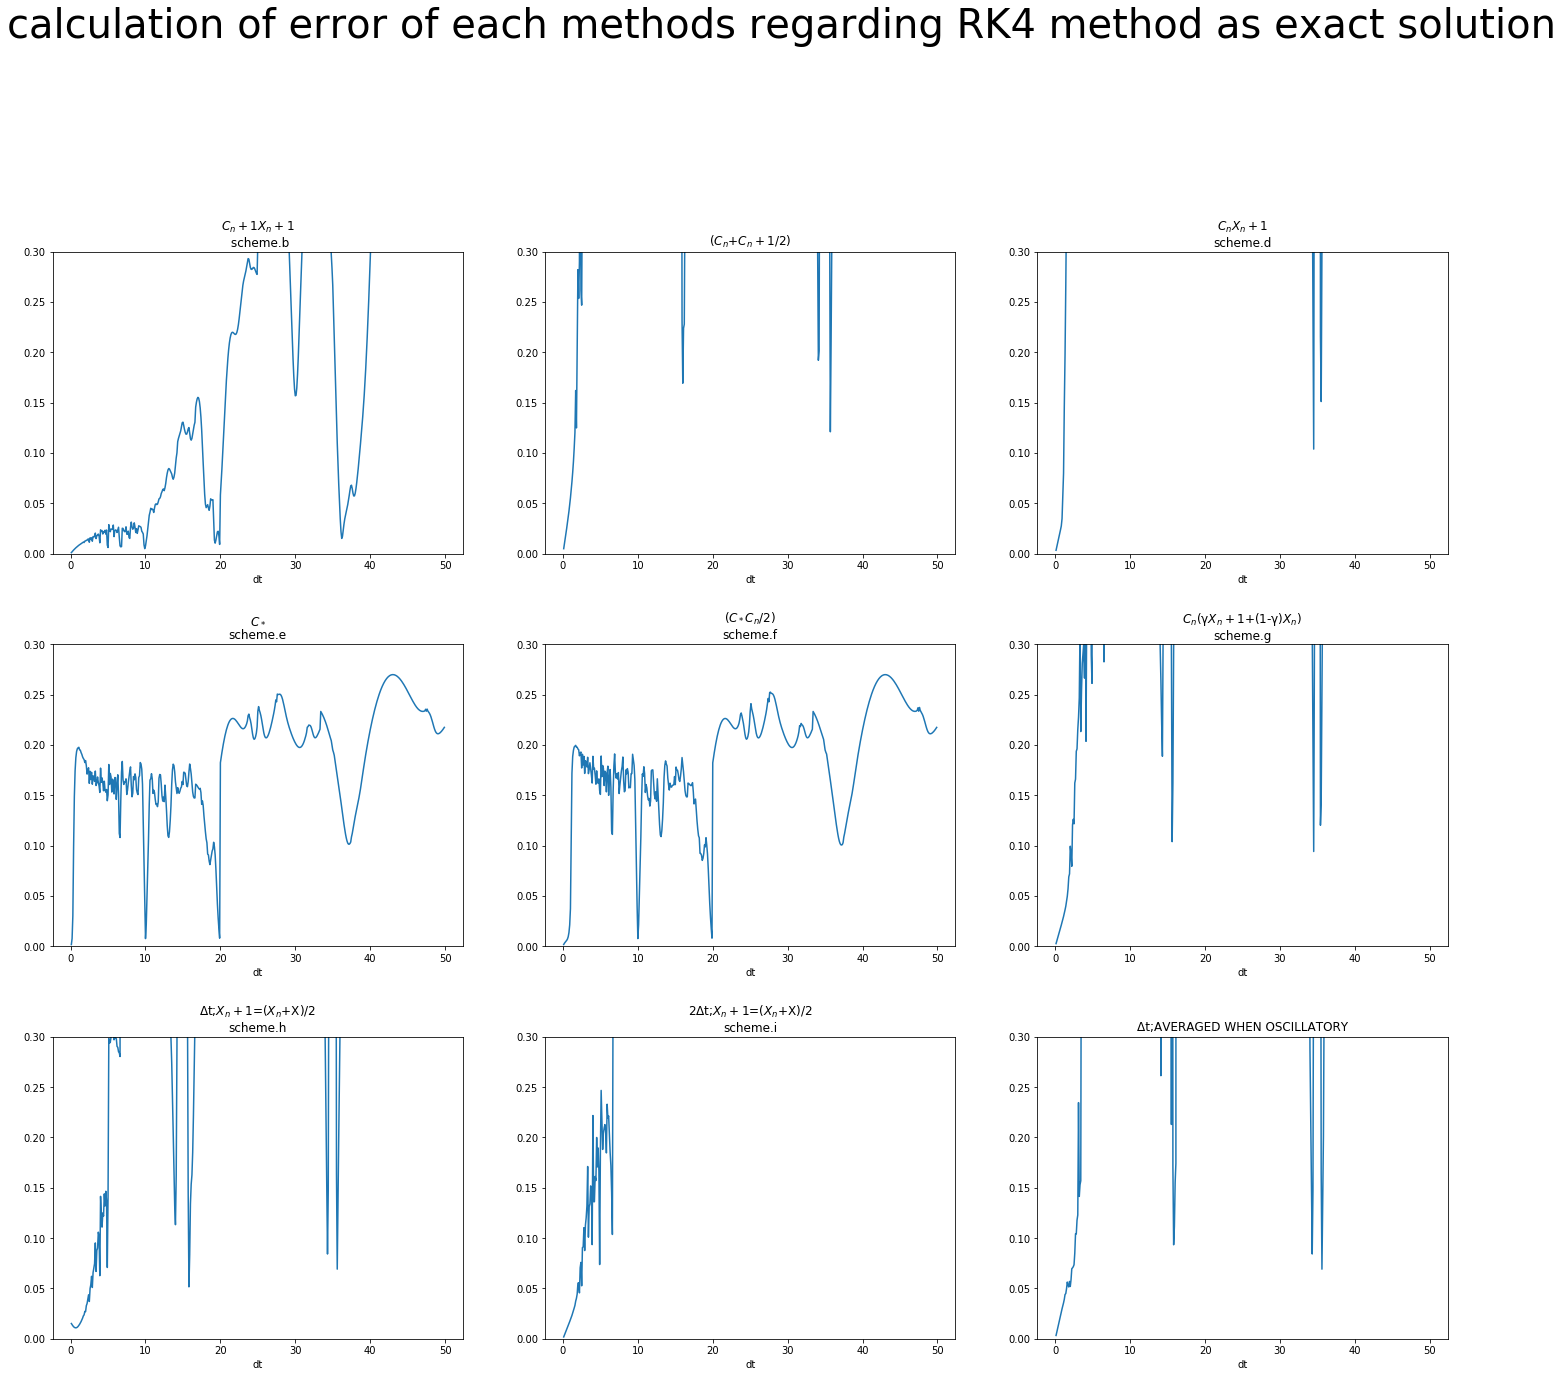

In [47]:
#the error from dt=0 to dt=2
AllSchemesERR(0,2,10,0.5,1.5)

In [40]:
#small test, consider the abnormal fluctuation from 0s to 20s
def testAllSchemesERR(X0,P,K,A,gamma):#calculation of error of each methods regarding RK4 method as exact solution
    fig=plt.figure(figsize=(25,20))
    AllSchemes=[SchemeB,SchemeX,SchemeD,SchemeE,SchemeF,SchemeG,SchemeH,SchemeI,SchemeHplus]
    SchemeName=['${C_n+1}$${X_n+1}$\n scheme.b','(${C_n}$+${C_n+1}$/2)','${C_n}$${X_n+1}$\nscheme.d'\
               ,'${C_*}$\nscheme.e','(${C_*}$${C_n}$/2)\nscheme.f','${C_n}$(γ${X_n+1}$+(1-γ)${X_n}$)\nscheme.g'\
               ,'Δt;${X_n+1}$=(${X_n}$+X)/2\nscheme.h','2Δt;${X_n+1}$=(${X_n}$+X)/2\nscheme.i','Δt;AVERAGED WHEN OSCILLATORY']
    fig.suptitle('Error of all 9 schemes regarding RK4 as exact solution\nWe find\
    that if the abnormal fluctuation from 0s to 20s\n isnt ignore, the value of error may have no representativeness ',fontsize=50,x=0.53,y=1.05,)
    plt.subplots_adjust(hspace=0.3)
    dtseries=np.arange(0.1,3.,0.1)#the value range of dt, I found that if the upper limit of dt is large than 2, the computer would fail to run the code
    ERRs=np.zeros(len(dtseries))
    Exact=SchemeRK4(X0,100000,P,0.001,K)[0]
    ww=0
    for i in range(0,9):
        
        ax=plt.subplot(330+i+1)

        

        ind=0
        
        for dt in dtseries:

            adjustedNum=int((len(Exact)-1)/(dt/0.001))
            adjustedExact=np.zeros(adjustedNum+1)
            j=0
            for q in range(0,adjustedNum+1):#Adjust Exact Solution
                adjustedExact[j]=Exact[q*int(dt/0.001)]
                j+=1
            
            
            if i==5:
            
                schemedata=AllSchemes[i](X0,adjustedNum,P,dt,K,gamma)
            
            
            elif i==6 or i==8:
                schemedata=AllSchemes[i](X0,adjustedNum,P,dt,K,A)
        
            else:
                schemedata=AllSchemes[i](X0,adjustedNum,P,dt,K)
            ComparedSolution=schemedata[0]   

            ExactSolution=adjustedExact

            ERRs[ind]=np.std((ExactSolution-ComparedSolution))
            ind+=1                                                             
                                                                              
        
        ax.plot(dtseries,ERRs)
        ax.set_xlabel('dt')
        ax.set_title(SchemeName[i])
        ax.set_ylim(0,0.3)

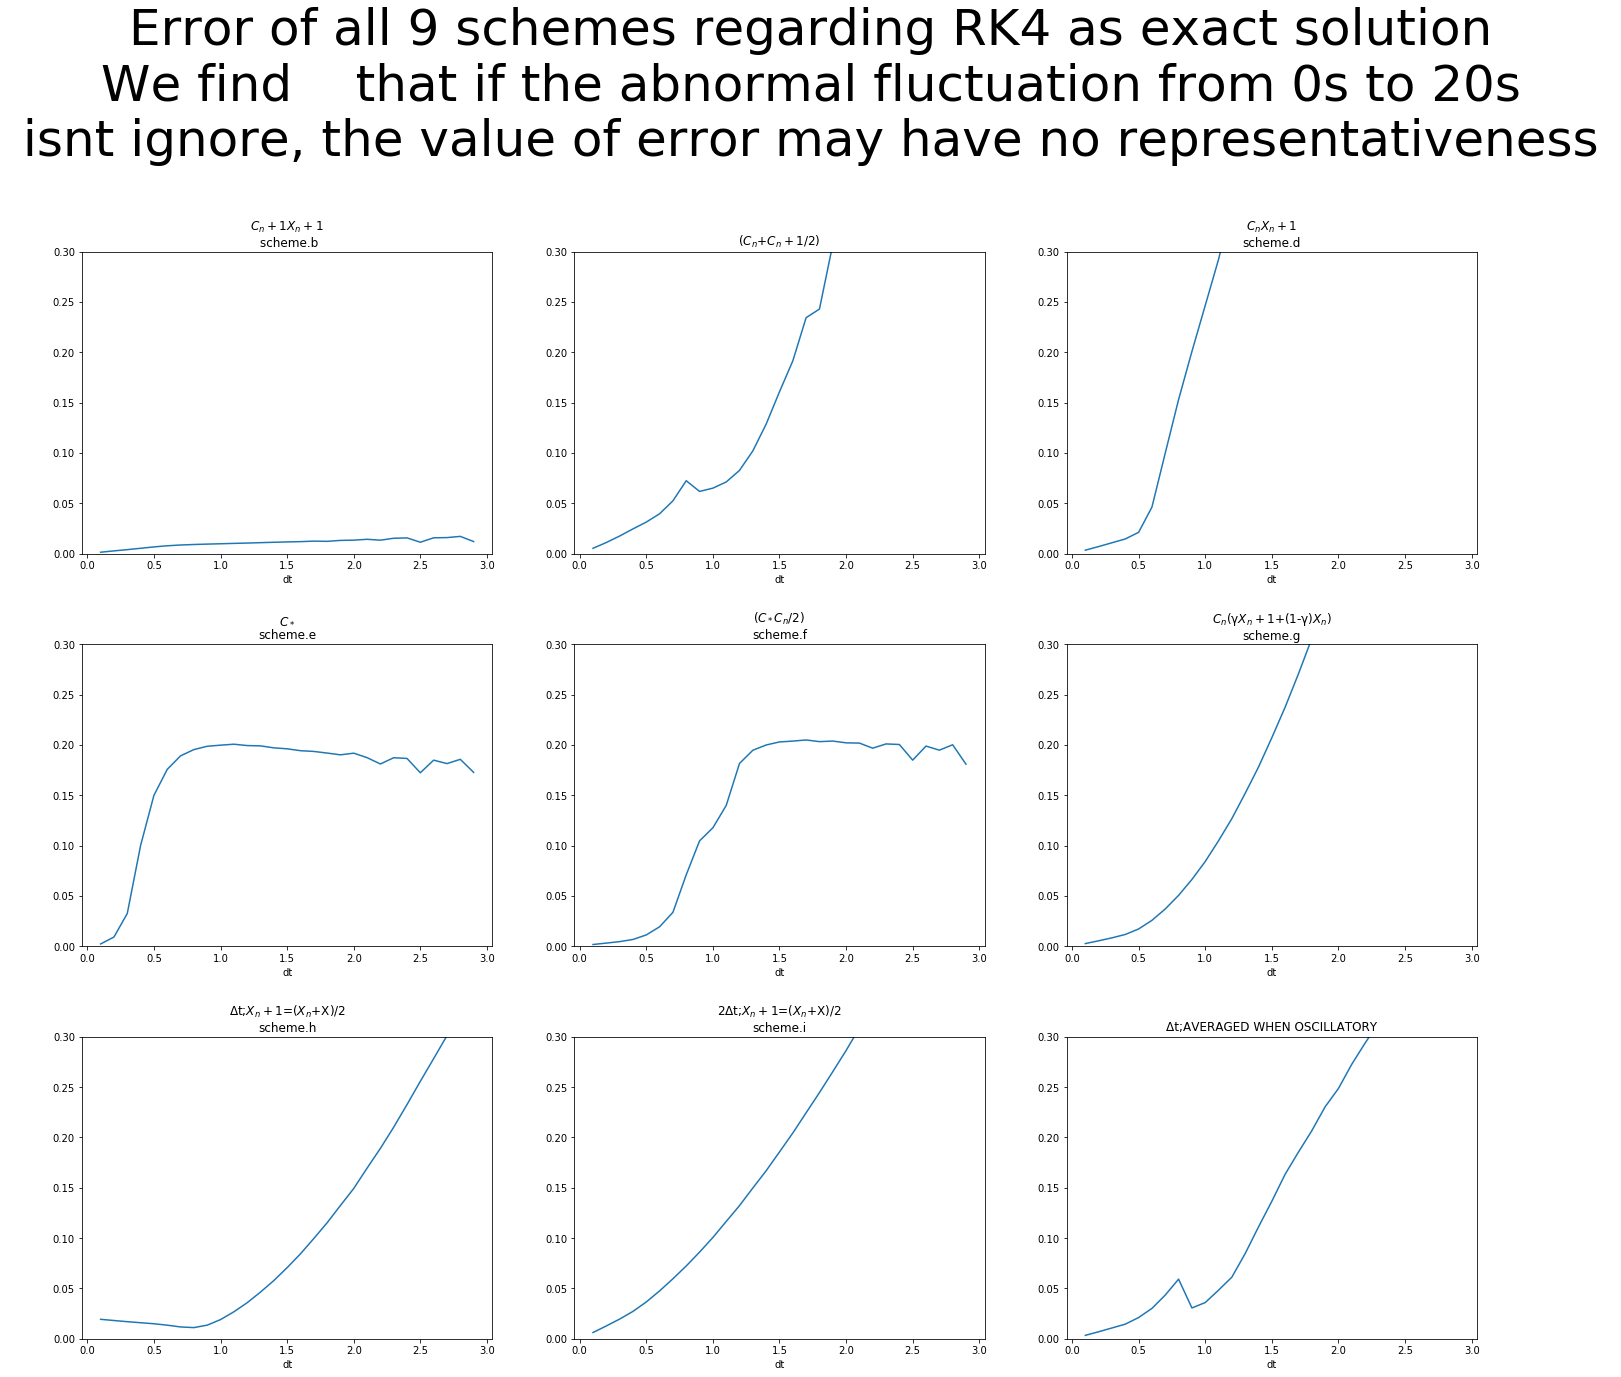

In [41]:
testAllSchemesERR(0,2,10,0.5,1.5)
#We find that if the abnormal fluctuation from 0s to 20s isn't ignore, the value of error may have no representativeness